<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_114/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import io
import requests
import urllib.request
import csv
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
url1 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
url2 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

In [4]:
df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
#Explorar columnas

In [6]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [7]:
df_sup.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [57]:
# Shape, NANs, Info
print(df_sup.shape)
df_sup.isna().sum()

(3493, 55)


CLAVE                        0
SITIO                        0
ORGANISMO_DE_CUENCA          0
ESTADO                       0
MUNICIPIO                    0
CUENCA                       1
CUERPO DE AGUA              14
TIPO                         0
SUBTIPO                     14
LONGITUD                     0
LATITUD                      0
PERIODO                      0
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48

In [14]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [15]:
# Shape, NANs, Info
print(df_sub.shape)
df_sub.isna().sum()

(1068, 57)


CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [16]:
# Diferentes columnas entre data sets
set(df_sub.columns).difference(set(df_sup.columns))

{'ACUIFERO',
 'ALC_mg/L',
 'AS_TOT_mg/L',
 'CALIDAD_ALC',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CONDUC',
 'CALIDAD_CR',
 'CALIDAD_DUR',
 'CALIDAD_FE',
 'CALIDAD_FLUO',
 'CALIDAD_HG',
 'CALIDAD_MN',
 'CALIDAD_N_NO3',
 'CALIDAD_PB',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CD_TOT_mg/L',
 'COLI_FEC_NMP/100_mL',
 'CONDUCT_mS/cm',
 'CR_TOT_mg/L',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_FE',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'DUR_mg/L',
 'FE_TOT_mg/L',
 'FLUORUROS_mg/L',
 'HG_TOT_mg/L',
 'MN_TOT_mg/L',
 'N_NO3_mg/L',
 'PB_TOT_mg/L',
 'SDT_M_mg/L',
 'SDT_mg/L'}

In [18]:
# Columnas compartidas entre data sets
set(df_sub.columns) & (set(df_sup.columns))

{'CALIDAD_COLI_FEC',
 'CLAVE',
 'CONTAMINANTES',
 'CUMPLE_CON_CF',
 'ESTADO',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'ORGANISMO_DE_CUENCA',
 'PERIODO',
 'SEMAFORO',
 'SITIO',
 'SUBTIPO'}

# Exploración y limpieza de datos
# Aguas subterraneas


### MAPEO DE INDICADORES DE CALIDAD:

In [146]:
print(df_sub['CALIDAD_COLI_FEC'].isna().sum())
df_sub['CALIDAD_COLI_FEC'].unique()

0


array(['Potable - Excelente', 'Aceptable', 'Contaminada', 'Buena calidad',
       'Fuertemente contaminada'], dtype=object)

In [147]:
print(df_sub['CALIDAD_SDT_ra'].isna().sum())
df_sub['CALIDAD_SDT_ra'].unique()

2


array(['Cultivos sensibles', 'Excelente para riego',
       'Cultivos con manejo especial', 'Cultivos tolerantes',
       'Indeseable para riego', nan], dtype=object)

In [151]:
print(df_sub['CALIDAD_SDT_salin'].isna().sum())
df_sub['CALIDAD_SDT_salin'].unique()

2


array(['Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas',
       nan], dtype=object)

In [152]:
print(df_sub['CALIDAD_CR'].isna().sum())
df_sub['CALIDAD_CR'].unique()

0


array(['Potable - Excelente', 'No apta como FAAP'], dtype=object)

In [153]:
print(df_sub['CALIDAD_CONDUC'].isna().sum())
df_sub['CALIDAD_CONDUC'].unique()

6


array(['Permisible para riego', 'Buena para riego', 'Dudosa para riego',
       'Indeseable para riego', nan, 'Excelente para riego'], dtype=object)

In [128]:
df_sub['CALIDAD_CD'].unique()

array(['Potable - Excelente', 'No apta como FAAP'], dtype=object)

In [130]:
df_sub['CALIDAD_AS'].unique()

array(['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente'],
      dtype=object)

In [131]:
df_sub['CALIDAD_ALC'].unique()

array(['Alta', 'Media', 'Baja', 'Indeseable como FAAP', nan], dtype=object)

In [133]:
df_sub['CALIDAD_PB'].unique()

array(['Potable - Excelente', 'No apta como FAAP'], dtype=object)

In [136]:
df_sub['CALIDAD_N_NO3'].unique()

array(['Potable - Excelente', 'Potable - Buena calidad',
       'No apta como FAAP', nan], dtype=object)

In [140]:
df_sub['CALIDAD_MN'].unique()

array(['Potable - Excelente', 'Puede afectar la salud',
       'Sin efectos en la salud - Puede dar color al agua'], dtype=object)

In [141]:
df_sub['CALIDAD_HG'].unique()

array(['Potable - Excelente', 'No apta como FAAP'], dtype=object)

In [142]:
df_sub['CALIDAD_FLUO'].unique()

array(['Potable - Optima', 'Alta', 'Baja', 'Media'], dtype=object)

In [143]:
df_sub['CALIDAD_FE'].unique()

array(['Potable - Excelente',
       'Sin efectos en la salud - Puede dar color al agua'], dtype=object)

In [144]:
df_sub['CALIDAD_DUR'].unique()

array(['Potable - Dura',
       'Muy dura e indeseable usos industrial y domestico',
       'Potable - Suave', 'Potable - Moderadamente suave', nan],
      dtype=object)

# Exploración y limpieza de datos
# Aguas superficiales

### MAPEO DE INDICADORES DE CALIDAD:

In [149]:
df_sub['CALIDAD_TOX'].unique()


KeyError: ignored

In [150]:
df_sub['CALIDAD_SST'].unique()


KeyError: ignored

In [148]:
df_sub['CALIDAD_ENTEROC'].unique()
df_sub['CALIDAD_E_COLI'].unique()
df_sub['CALIDAD_DQO'].unique()
df_sub['CALIDAD_DBO'].unique()
df_sub['CALIDAD_COLI_FEC'].unique()
df_sub['CALIDAD_OD'].unique()

KeyError: ignored

In [19]:
df_sub

CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                     POZO R013 CAADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENTES     AGUASCALIENTES   
2          LERMA SANTIAGO PACIFICO       AGUASCALIENTES              COSIO   
3          LERMA SANTIAGO PACIFICO       AGUASCALIENTES    RINCON DE ROMOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR             LA PAZ   
...                            ...                  ...                ...   
1063                     RIO BRAVO           NUEVO LEON            LINARES   
1064                     RIO BRAVO           NUEVO LEON            LINARES   
1065                     RIO BRAVO           NUEVO LEON  CADEREYTA JIMENEZ   
1066                     RIO BRAVO           NUEVO LEON            GALEANA   
1067                     RIO BRAVO           NUEVO LEON            GALEANA   

                     ACUIFERO SUBTIPO   LONGITUD   LATITUD  PERIODO  ...  \
0          VALLE DE CHICALOTE    POZO -102.02210  22.20887     2020  ...   
1          VALLE DE CHICALOTE    POZO -102.20075  21.99958     2020  ...   
2     VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685     2020  ...   
3     VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435     2020  ...   
4                TODOS SANTOS    POZO -110.24480  23.45138     2020  ...   
...                       ...     ...        ...       ...      ...  ...   
1063            CITRICOLA SUR    POZO  -99.54191  24.76036     2020  ...   
1064            CITRICOLA SUR    POZO  -99.70099  24.78280     2020  ...   
1065          CITRICOLA NORTE    POZO  -99.82249  25.55197     2020  ...   
1066    NAVIDAD-POTOSI-RAICES    POZO -100.32683  24.80118     2020  ...   
1067    NAVIDAD-POTOSI-RAICES    POZO -100.73302  25.09380     2020  ...   

      CUMPLE_CON_DUR CUMPLE_CON_CF  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0                 SI            SI              SI            SI   
1                 SI            SI              SI            SI   
2                 SI            SI              SI            NO   
3                 SI            SI              SI            SI   
4                 SI            SI              NO            SI   
...              ...           ...             ...           ...   
1063              NO            SI              NO            SI   
1064              SI            SI              NO            SI   
1065              NO            SI              NO            SI   
1066              SI            SI              SI            SI   
1067              SI            SI              SI            SI   

      CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0                SI            SI            SI            SI            SI   
1                SI            SI            SI            SI            SI   
2                SI            SI            SI            SI            SI   
3                SI            SI            SI            SI            SI   
4                SI            SI            SI            SI            SI   
...             ...           ...           ...           ...           ...   
1063             SI            SI  

In [23]:
# Columnas categóricas
# Estos datos pueden servir de referencia una vez completado el análisis. Aún así observaremos su proporción de el data set y la posibilidad de compeltar datos faltantes
columnasCategoricas = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_CONDUC']

In [98]:
# CLAVE es único para cada registro, no NANs
df_sub.CLAVE.isna().sum()

0

In [101]:
# Sitio también son etiquetas únicas a excepción de un par de ellas. No NANs
print(df_sub.SITIO.isna().sum())
print(len(df_sub.SITIO.unique()), df_sub.shape)

0
1066 (1068, 57)


In [104]:
# No existen NANs y los datos son consistentes con el contexto.
print(df_sub.ORGANISMO_DE_CUENCA.isna().sum())
print(len(df_sub.ORGANISMO_DE_CUENCA.unique()), df_sub.shape)

0
13 (1068, 57)


Text(0.5, 1.0, 'ORGANISMO_DE_CUENCA, cuentas')

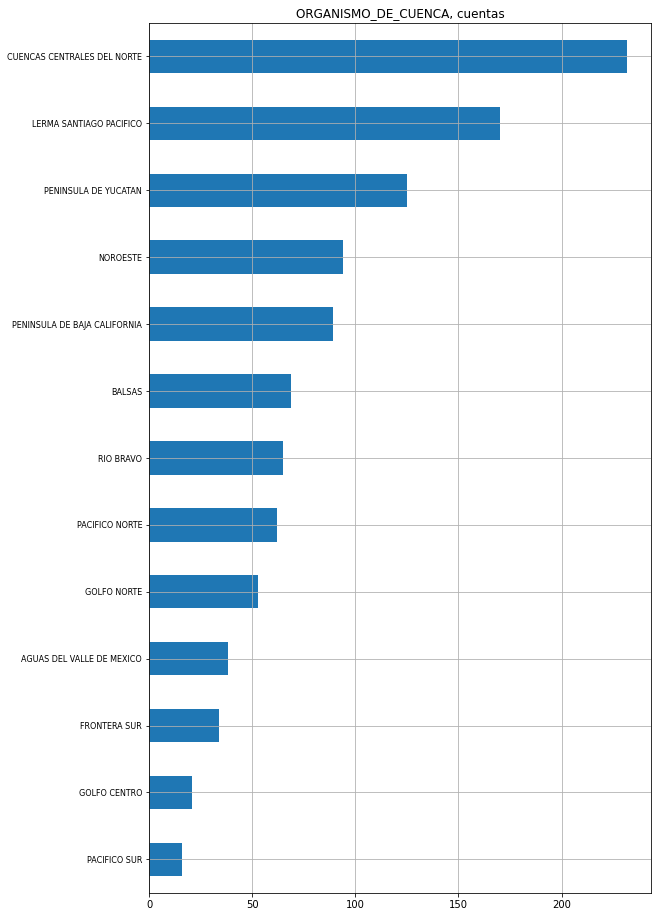

In [111]:
fix, ax = plt.subplots(1,1,figsize=(9,16))
df_sub.ORGANISMO_DE_CUENCA.value_counts().sort_values().plot(kind='barh')
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize':8});
ax.grid(True)
ax.set_title('ORGANISMO_DE_CUENCA, cuentas')

In [112]:
# No existen NANs y los datos son consistentes con el contexto.
print(df_sub.ESTADO.isna().sum())
print(len(df_sub.ESTADO.unique()), df_sub.shape)

0
32 (1068, 57)


Text(0.5, 1.0, 'ORGANISMO_DE_CUENCA, cuentas')

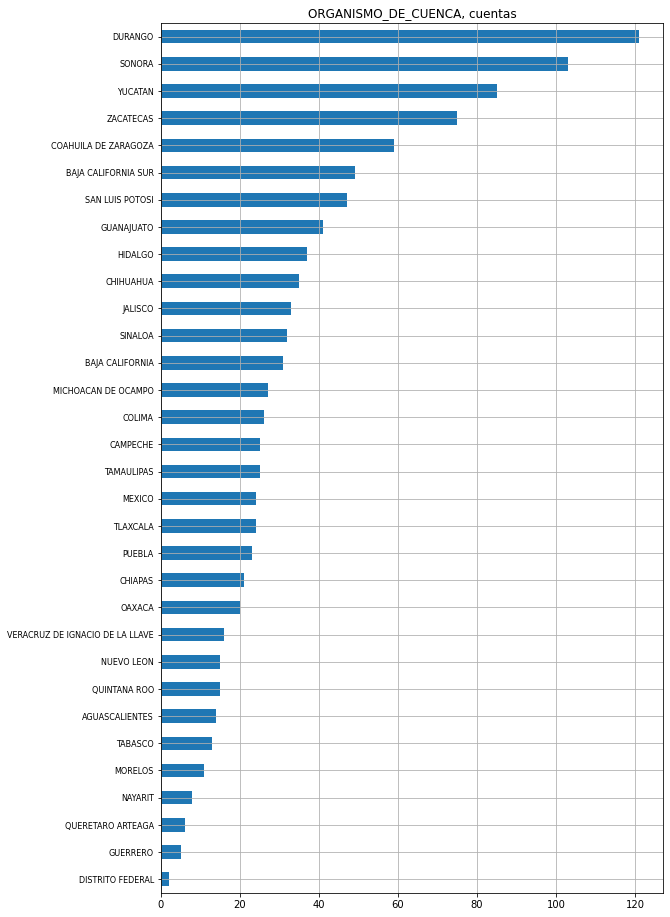

In [113]:
column = 'ESTADO'
fix, ax = plt.subplots(1,1,figsize=(9,16))
df_sub[column].value_counts().sort_values().plot(kind='barh')
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize':8});
ax.grid(True)
ax.set_title('ORGANISMO_DE_CUENCA, cuentas')

In [114]:
# No existen NANs
print(df_sub.MUNICIPIO.isna().sum())
print(len(df_sub.MUNICIPIO.unique()), df_sub.shape)

0
452 (1068, 57)


Text(0.5, 1.0, 'ORGANISMO_DE_CUENCA, cuentas')

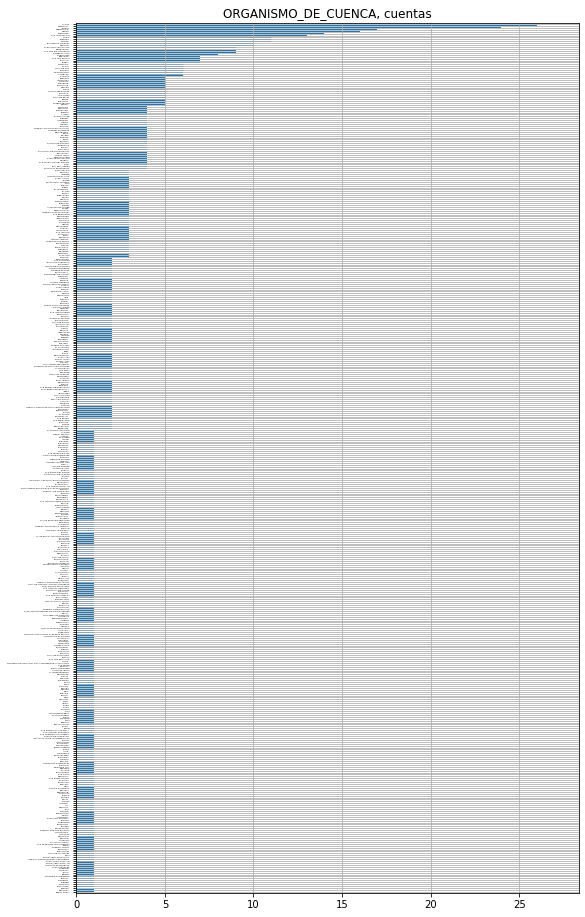

In [116]:
column = 'MUNICIPIO'
fix, ax = plt.subplots(1,1,figsize=(9,16))
df_sub[column].value_counts().sort_values().plot(kind='barh')
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize':2});
ax.grid(True)
ax.set_title('ORGANISMO_DE_CUENCA, cuentas')

In [117]:
# No existen NANs
print(df_sub.ACUIFERO.isna().sum())
print(len(df_sub.ACUIFERO.unique()), df_sub.shape)

0
273 (1068, 57)


Text(0.5, 1.0, 'ORGANISMO_DE_CUENCA, cuentas')

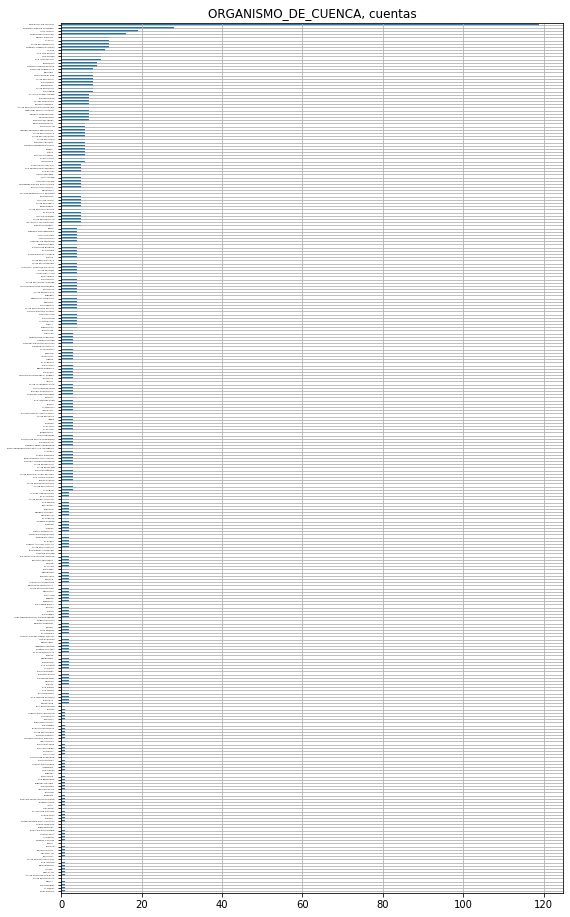

In [118]:
column = 'ACUIFERO'
fix, ax = plt.subplots(1,1,figsize=(9,16))
df_sub[column].value_counts().sort_values().plot(kind='barh')
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize':2});
ax.grid(True)
ax.set_title('ORGANISMO_DE_CUENCA, cuentas')